In [2]:
library(DropletUtils)
library(scds)
library(feather)
library(Matrix)
library(SoupX)
library(data.table)
library(Seurat)

In [20]:
dataDirs1 = c("/Monkey_P_Caudate_Rep1")

In [22]:
toc = Seurat::Read10X(file.path(dataDirs1, "filtered_feature_bc_matrix", "soupx_data"))
tod = Seurat::Read10X(file.path(dataDirs1, "raw_feature_bc_matrix", "soupx_data"))
#sc = SoupChannel(tod, toc)

In [23]:
sc1 = SoupChannel(tod, toc, calcSoupProfile = FALSE)
sc1 = estimateSoup(sc1)

In [24]:
sc1

Channel with 54894 genes and 6269 cells



In [25]:
str(sc1)

List of 4
 $ toc        :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:21274206] 72 76 79 98 105 111 112 118 120 124 ...
  .. ..@ p       : int [1:6270] 0 4614 7315 9348 10139 13486 18670 21926 24692 26084 ...
  .. ..@ Dim     : int [1:2] 54894 6269
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:54894] "WASH7P" "MIR6859-1" "MIR1302-2HG" "MIR1302-2" ...
  .. .. ..$ : chr [1:6269] "AAACCCAAGAGCGACT-1" "AAACCCACAAATACAG-1" "AAACCCACAAGGTTGG-1" "AAACCCACACGTTCGG-1" ...
  .. ..@ x       : num [1:21274206] 1 4 1 2 1 2 4 1 1 1 ...
  .. ..@ factors : list()
 $ metaData   :'data.frame':	6269 obs. of  1 variable:
  ..$ nUMIs: num [1:6269] 12820 5540 3580 984 7648 ...
 $ nDropUMIs  : Named num [1:6794880] 0 2 4 2 0 0 0 0 0 0 ...
  ..- attr(*, "names")= chr [1:6794880] "AAACCCAAGAAACACT-1" "AAACCCAAGAAACCAT-1" "AAACCCAAGAAACCCA-1" "AAACCCAAGAAACCCG-1" ...
 $ soupProfile:'data.frame':	54894 obs. of  2 variables:
  ..$ est   : num [1:54894] 0 0 0 0 0 ...
  ..$ 

In [26]:
set.seed(1)

In [27]:
srat = CreateSeuratObject(sc1$toc)

In [28]:
srat = NormalizeData(srat)

In [29]:
srat = ScaleData(srat)

Centering and scaling data matrix



In [30]:
#srat = FindVariableGenes(srat)
srat = FindVariableFeatures(srat)

In [31]:
srat = RunPCA(srat,pcs.compute=30)

PC_ 1 
Positive:  SLC1A2, SLC1A3, ADGRV1, SPARCL1, C1orf61, PDZRN4, NEAT1, ACACB, TCF4, FBXL7 
	   DAAM2, ATP1A2, PREX2, ALDH1A1, ATP13A4, LUZP2, ETNPPL, MFGE8, C1orf21, SLC15A2 
	   GLI3, ACSBG1, TMTC2, LRIG1, AC008957.2, NHSL1, PRKCA, GLIS3, FARP1, PRDM16 
Negative:  DLGAP2, PTPRN2, PDE10A, CACNA1E, RYR2, MYT1L, PDE1B, CACNA2D3, ABLIM2, RYR3 
	   SLIT3, ROBO2, ADCY5, AC005906.2, SLC35F3, FGF14, CELF5, LRRC7, GALNT17, DGKI 
	   ACTN1, BCL11B, PTPN5, GABRB3, INPP5A, SCN2A, TENM2, PDZD2, DPP6, KCNIP4 
PC_ 2 
Positive:  AC011246.1, LINC00499, LUCAT1, PRDM16, ACSBG1, SLC25A18, ALDH1A1, CABLES1, ADGRV1, GLI3 
	   ETNPPL, AL355612.1, PDZRN4, ATP13A4, ITGB4, PREX2, MFGE8, OLFM2, ACOT11, DGKG 
	   GPAM, F3, NHSL1, PRR5, L3MBTL4, OLAH, GLIS3, SLC15A2, EYA2, CHPT1 
Negative:  MBP, DOCK10, ST18, ZNF536, C10orf90, MOBP, GARNL3, RNF220, ENPP2, MOG 
	   PIP4K2A, CNDP1, AL359091.1, PEX5L, ST6GALNAC3, PLCL1, HAPLN2, MAG, CREB5, ZEB2 
	   OPALIN, CLMN, MYRF, PDE8A, PLLP, AJ009632.2, TMEM144, FA2H, NKA

In [32]:
srat = RunTSNE(srat,dims.use=seq(30))

In [33]:
srat <- FindNeighbors(srat, dims = 1:30)

Computing nearest neighbor graph

Computing SNN



In [34]:
srat = FindClusters(srat, resolution = 0.5)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6269
Number of edges: 265520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9286
Number of communities: 21
Elapsed time: 2 seconds


In [35]:
str(srat)

Formal class 'Seurat' [package "Seurat"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "Seurat"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:21274206] 72 76 79 98 105 111 112 118 120 124 ...
  .. .. .. .. .. ..@ p       : int [1:6270] 0 4614 7315 9348 10139 13486 18670 21926 24692 26084 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 54894 6269
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:54894] "WASH7P" "MIR6859-1" "MIR1302-2HG" "MIR1302-2" ...
  .. .. .. .. .. .. ..$ : chr [1:6269] "AAACCCAAGAGCGACT-1" "AAACCCACAAATACAG-1" "AAACCCACAAGGTTGG-1" "AAACCCACACGTTCGG-1" ...
  .. .. .. .. .. ..@ x       : num [1:21274206] 1 4 1 2 1 2 4 1 1 1 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:21274206] 72 76 79 98 105 111 1

In [36]:
PBMC_DR = as.data.frame(srat$tsne@cell.embeddings)

In [37]:
colnames(PBMC_DR) = c('RD1','RD2')

In [38]:
str(PBMC_DR)

'data.frame':	6269 obs. of  2 variables:
 $ RD1: num  3.887 39.21 -23.057 -0.288 30.988 ...
 $ RD2: num  9.5 -8.46 -25.3 -10.52 6.1 ...


In [39]:
PBMC_DR$Cluster = factor(srat@meta.data[rownames(PBMC_DR),'RNA_snn_res.0.5'])

In [40]:
str(srat@meta.data)

'data.frame':	6269 obs. of  5 variables:
 $ orig.ident     : Factor w/ 1 level "SeuratProject": 1 1 1 1 1 1 1 1 1 1 ...
 $ nCount_RNA     : num  12820 5540 3580 984 7648 ...
 $ nFeature_RNA   : int  4614 2701 2033 791 3347 5184 3256 2766 1392 5798 ...
 $ RNA_snn_res.0.5: Factor w/ 21 levels "0","1","2","3",..: 3 1 4 5 1 2 18 1 7 10 ...
 $ seurat_clusters: Factor w/ 21 levels "0","1","2","3",..: 3 1 4 5 1 2 18 1 7 10 ...


In [26]:
#saveRDS(PBMC_DR, file = "~/Documents/Jing/p01_scRNA_striatum/Peanut/1_soupx/caudate_01_DR.rds")

In [27]:
#PBMC_DR <- readRDS("caudate_01_DR.rds")

In [41]:
getwd()

[1] "/slow/Jing/Penuts_cellranger_snRNA_results_b2/1_soupx"

In [42]:
str(PBMC_DR)

'data.frame':	6269 obs. of  3 variables:
 $ RD1    : num  3.887 39.21 -23.057 -0.288 30.988 ...
 $ RD2    : num  9.5 -8.46 -25.3 -10.52 6.1 ...
 $ Cluster: Factor w/ 21 levels "0","1","2","3",..: 3 1 4 5 1 2 18 1 7 10 ...


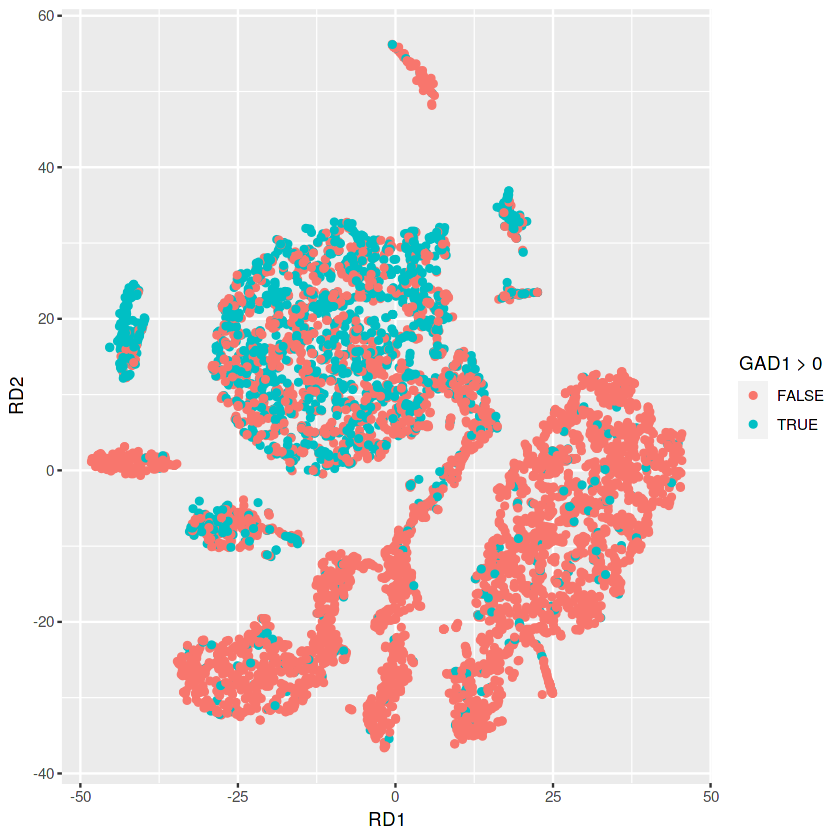

In [43]:
library(ggplot2)
PBMC_DR$GAD1 = sc1$toc["GAD1", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = GAD1 > 0))
plot(gg)

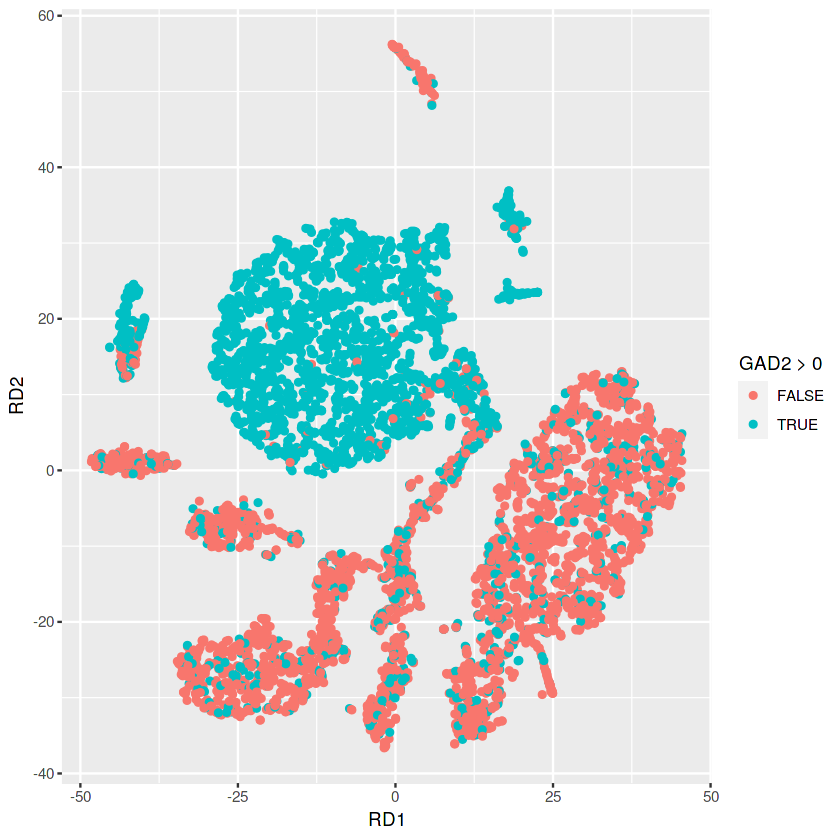

In [44]:
library(ggplot2)
PBMC_DR$GAD2 = sc1$toc["GAD2", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = GAD2 > 0))
plot(gg)

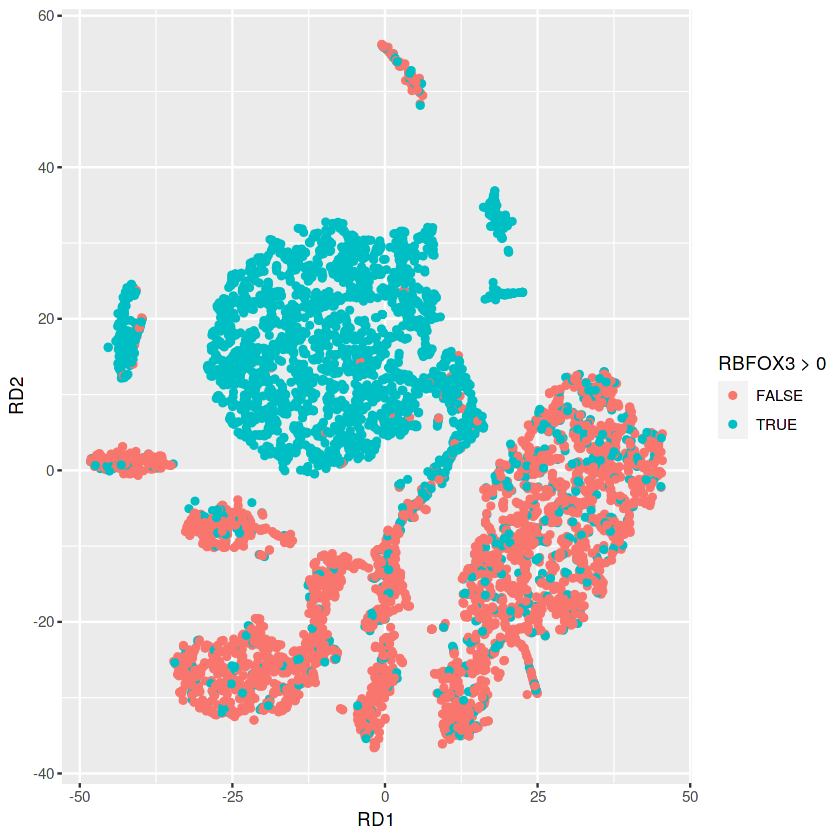

In [45]:
library(ggplot2)
PBMC_DR$RBFOX3 = sc1$toc["RBFOX3", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = RBFOX3 > 0))
plot(gg)

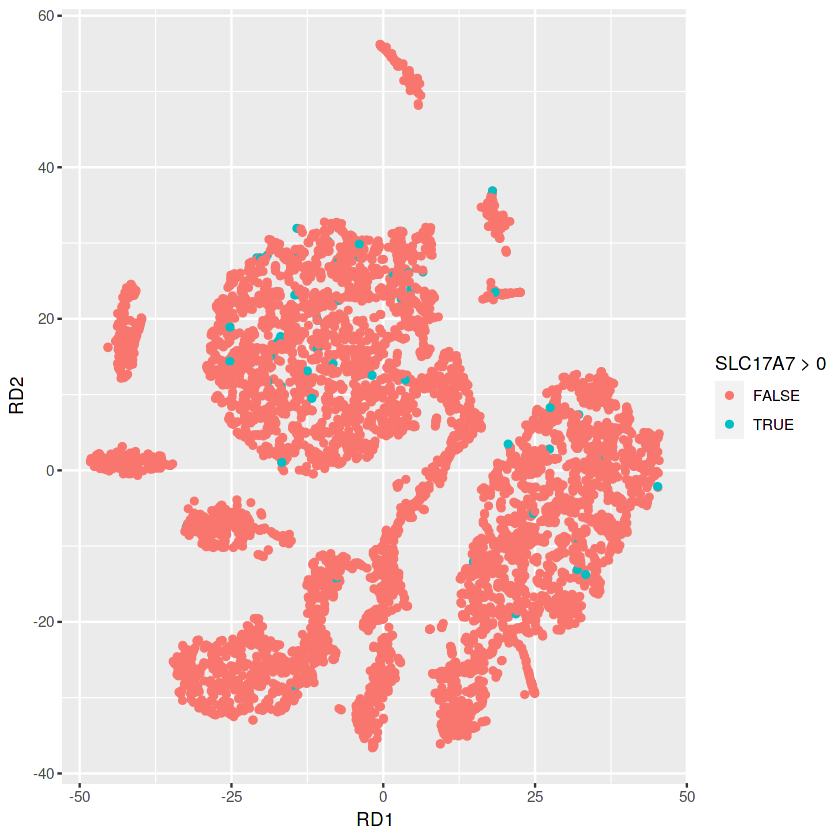

In [46]:
library(ggplot2)
PBMC_DR$SLC17A7 = sc1$toc["SLC17A7", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = SLC17A7 > 0))
plot(gg)

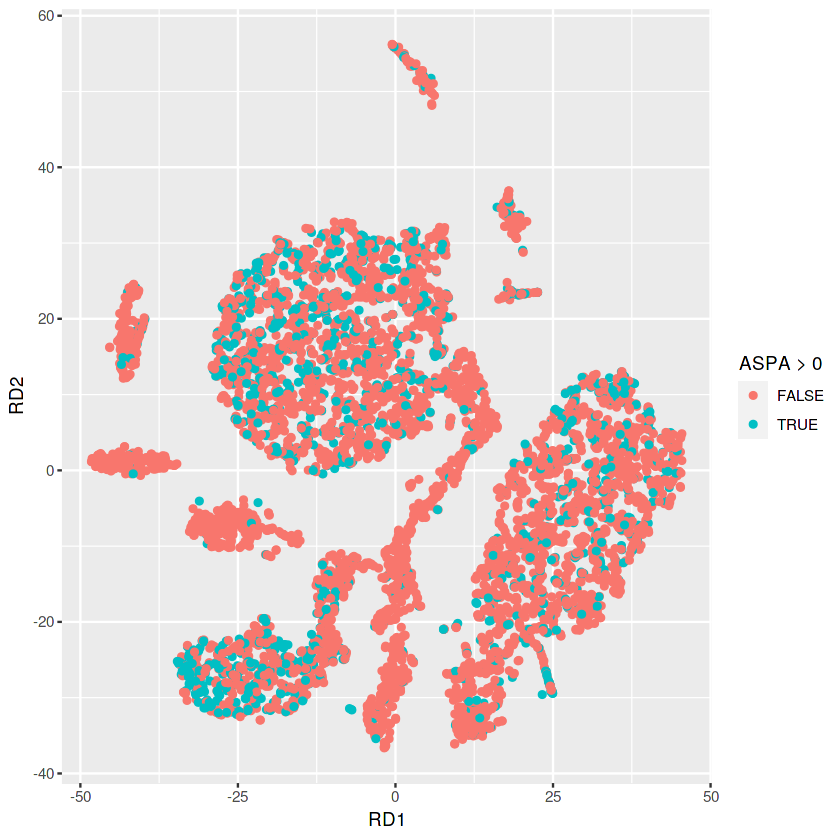

In [47]:
library(ggplot2)
PBMC_DR$ASPA = sc1$toc["ASPA", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = ASPA > 0))
plot(gg)

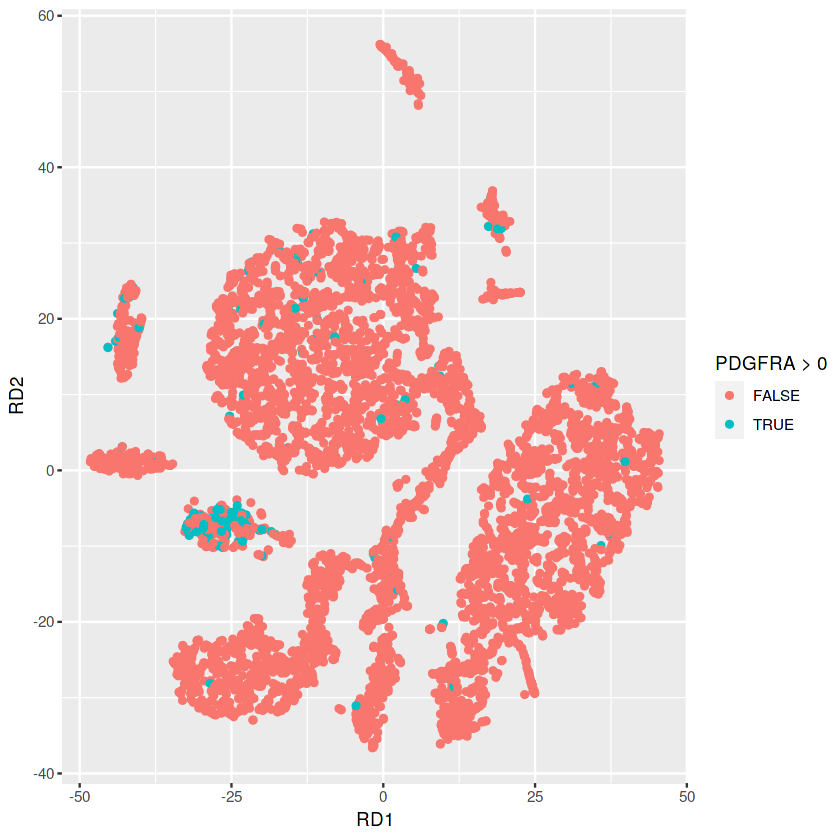

In [48]:
library(ggplot2)
PBMC_DR$PDGFRA = sc1$toc["PDGFRA", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = PDGFRA > 0))
plot(gg)

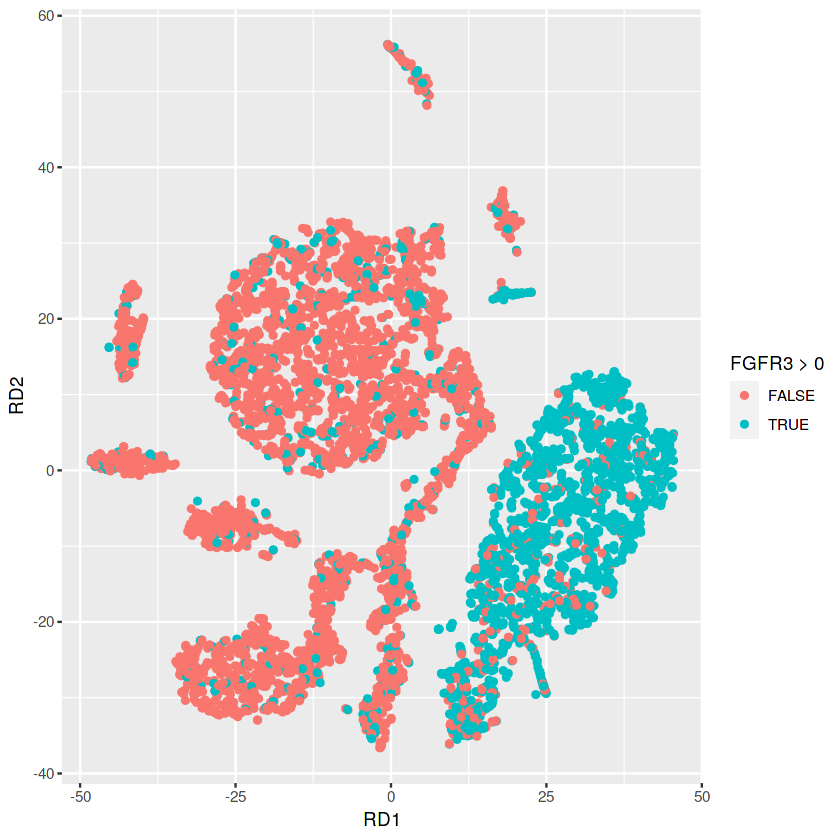

In [49]:
library(ggplot2)
PBMC_DR$FGFR3 = sc1$toc["FGFR3", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = FGFR3 > 0))
plot(gg)

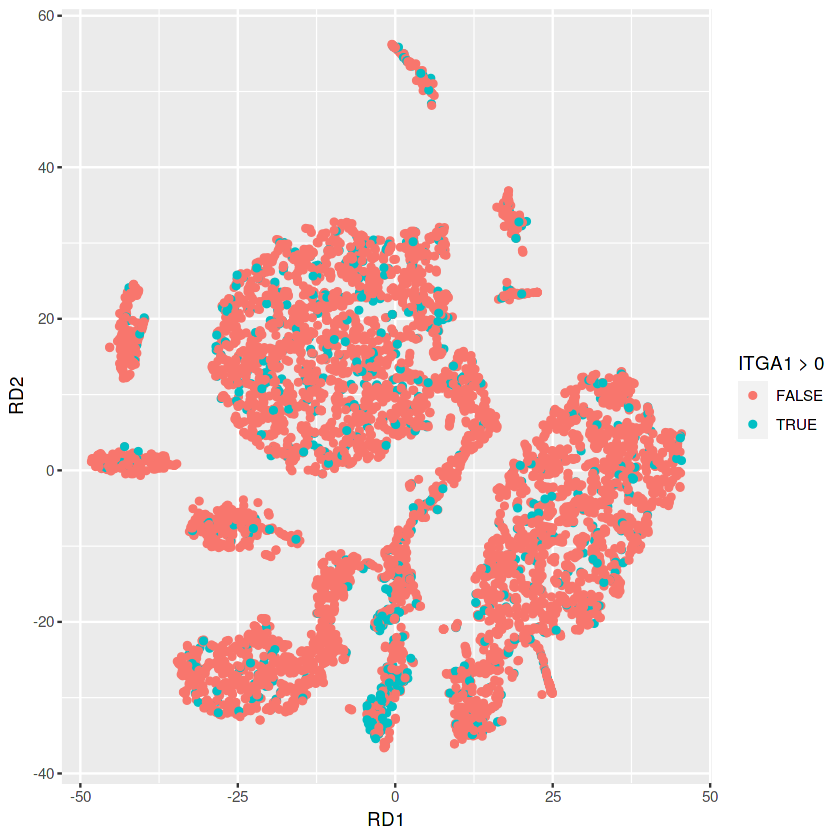

In [50]:
library(ggplot2)
PBMC_DR$ITGA1 = sc1$toc["ITGA1", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = ITGA1 > 0))
plot(gg)

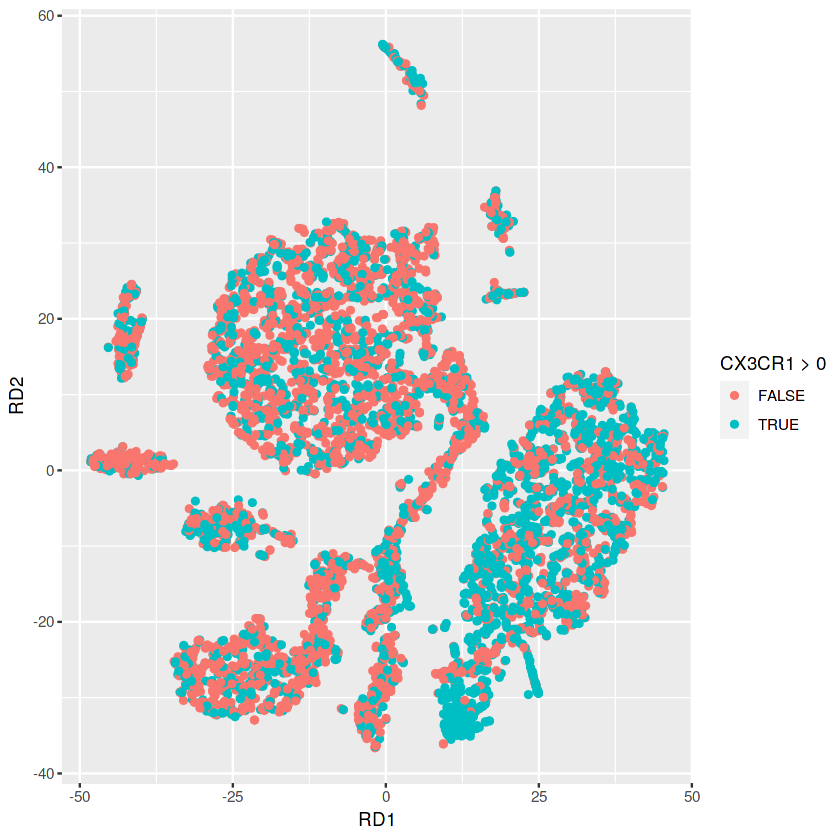

In [51]:
library(ggplot2)
PBMC_DR$CX3CR1 = sc1$toc["GFAP", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = CX3CR1 > 0))
plot(gg)

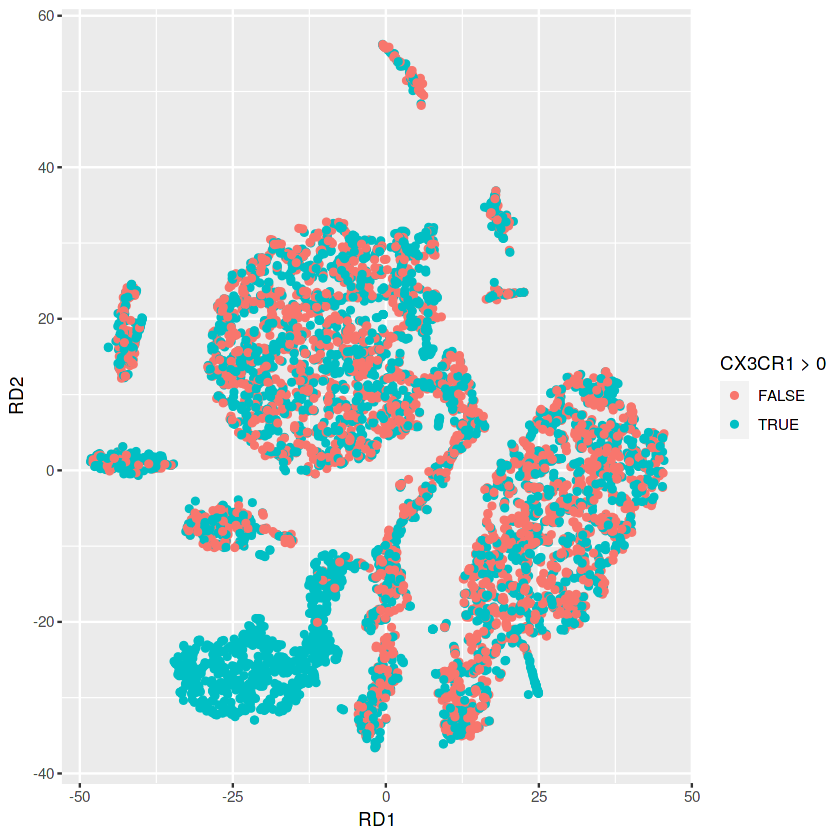

In [52]:
library(ggplot2)
PBMC_DR$CX3CR1 = sc1$toc["MBP", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = CX3CR1 > 0))
plot(gg)

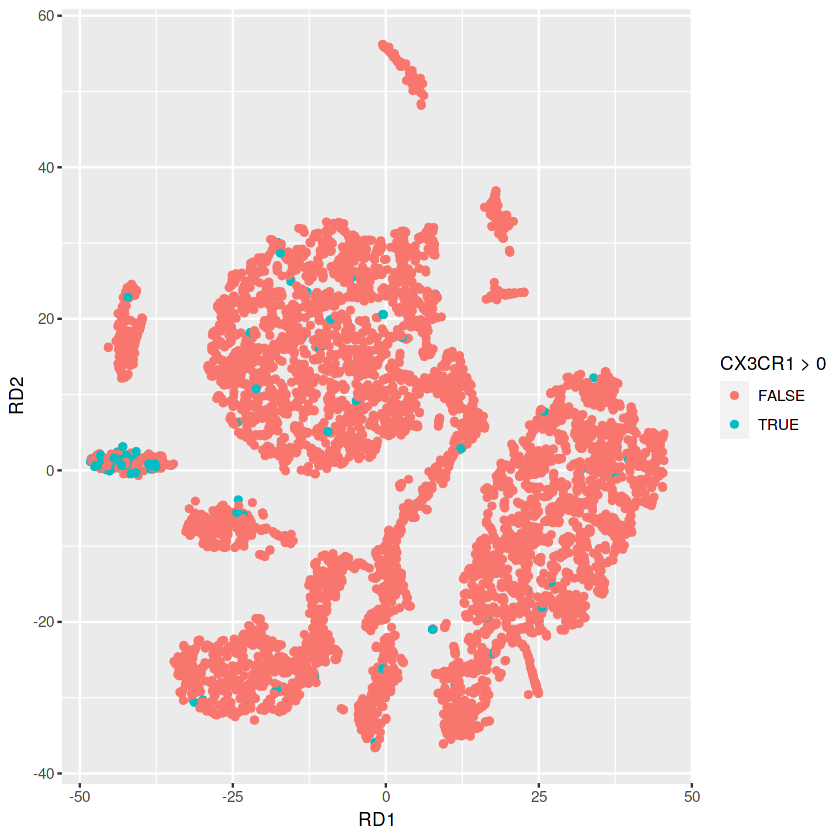

In [53]:
library(ggplot2)
PBMC_DR$CX3CR1 = sc1$toc["CX3CR1", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = CX3CR1 > 0))
plot(gg)

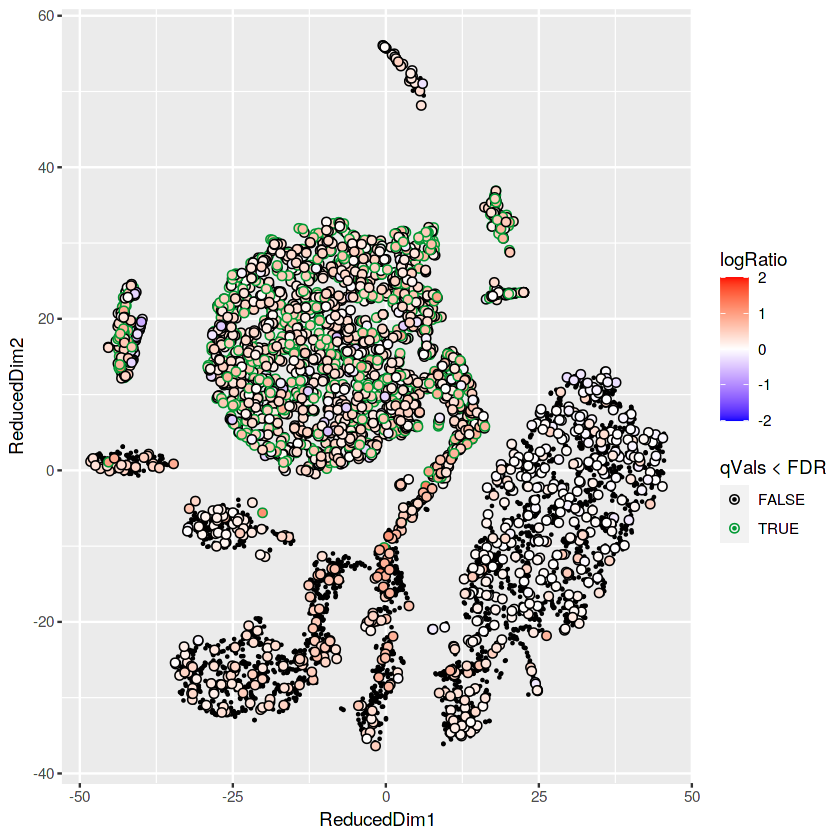

In [54]:
gg = plotMarkerMap(sc1, "RBFOX3", PBMC_DR)
plot(gg)

In [55]:
sc1 = setDR(sc1, PBMC_DR)

Warning message in setDR(sc1, PBMC_DR):
“DR has 12 columns where 2 were expected.  Using first two.”


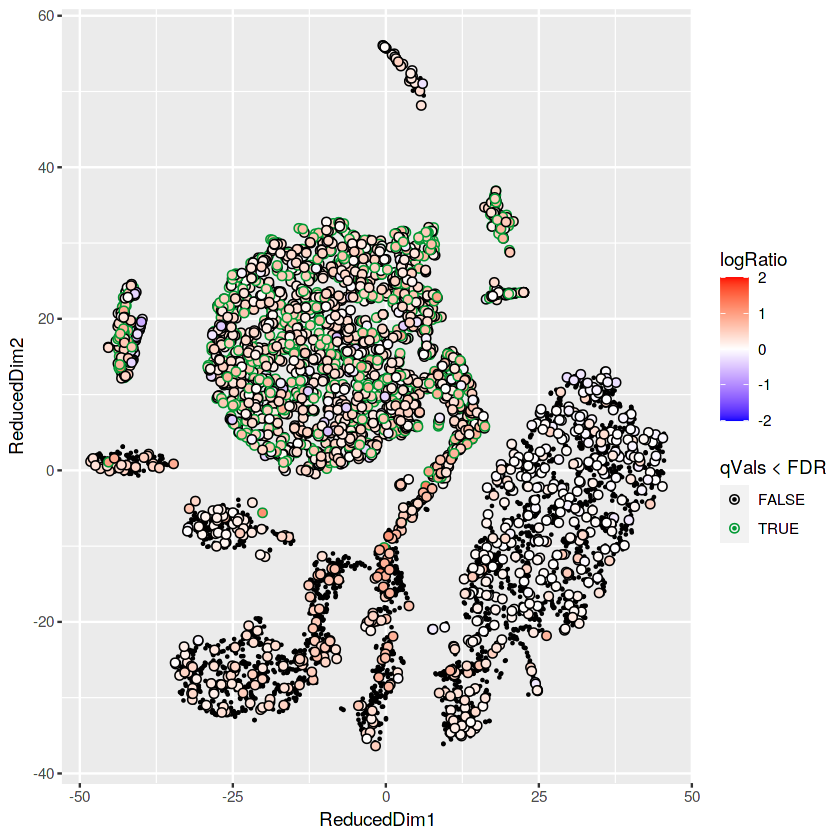

In [56]:
gg = plotMarkerMap(sc1, "RBFOX3")
plot(gg)

In [57]:
sc1 = setContaminationFraction(sc1, 0.2)

In [58]:
head(sc1$soupProfile[order(sc1$soupProfile$est, decreasing = TRUE), ], n = 20)

est         counts
MALAT1     0.042203797 406378
RBFOX1     0.007434564  71587
PHACTR1    0.006700008  64514
AC120193.1 0.005111983  49223
PCDH9      0.004618783  44474
DGKB       0.004409933  42463
NRXN3      0.004395290  42322
GPC5       0.004139602  39860
ROBO2      0.003507446  33773
CADM2      0.003136896  30205
NRXN1      0.002997629  28864
ANKS1B     0.002931578  28228
DLG2       0.002898137  27906
PDE10A     0.002893775  27864
LSAMP      0.002752327  26502
PLCB1      0.002695623  25956
ADGRB3     0.002607659  25109
SNHG14     0.002603712  25071
CSMD1      0.002447620  23568
NLGN1      0.002351971  22647

In [59]:
sc1 = setClusters(sc1, PBMC_DR$Cluster)

No gene lists provided, attempting to find and plot cluster marker genes.

Found 3421 marker genes

Warning message:
“Removed 90014 rows containing non-finite values (stat_ydensity).”


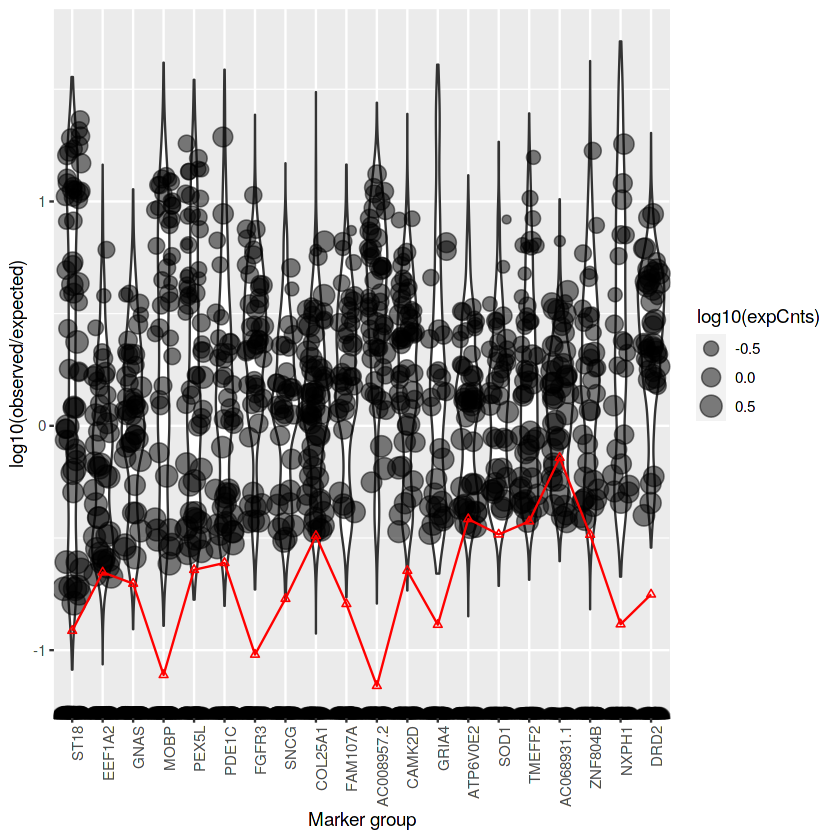

In [60]:
plotMarkerDistribution(sc1)

In [54]:
#str(sc1)

In [45]:
#sc1 = inferNonExpressedGenes(sc1)
##Error in inferNonExpressedGenes(sc1): could not find function "inferNonExpressedGenes"
##Traceback:

In [61]:
igGenes = c("ST18", "EEF1A2","GNAS","MOBP","PEX5L","PDE1C","FGFR3","SNCG","COL25A1","FAM107A","AC008957.2","CAMK2D","GRIA4","ATP6V0E2","SOD1","TMEFF2","AC068931.1","ZNF804B","NXPH1","DRD2")

In [62]:
useToEst = estimateNonExpressingCells(sc1, nonExpressedGeneList = list(IG = igGenes))

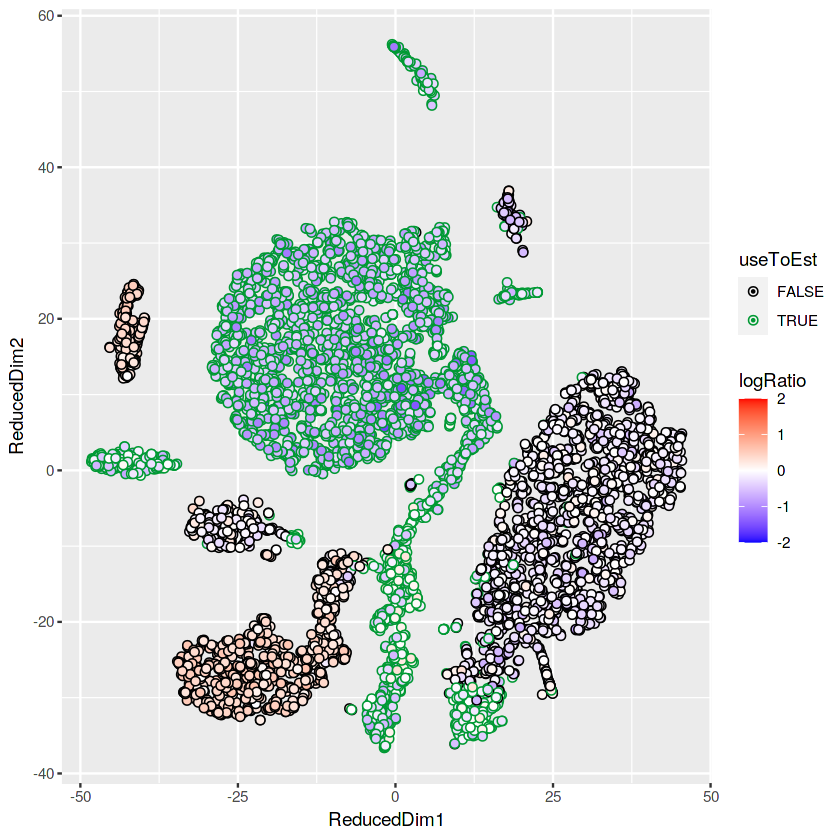

In [63]:
plotMarkerMap(sc1, geneSet = igGenes, DR = PBMC_DR, useToEst = useToEst)

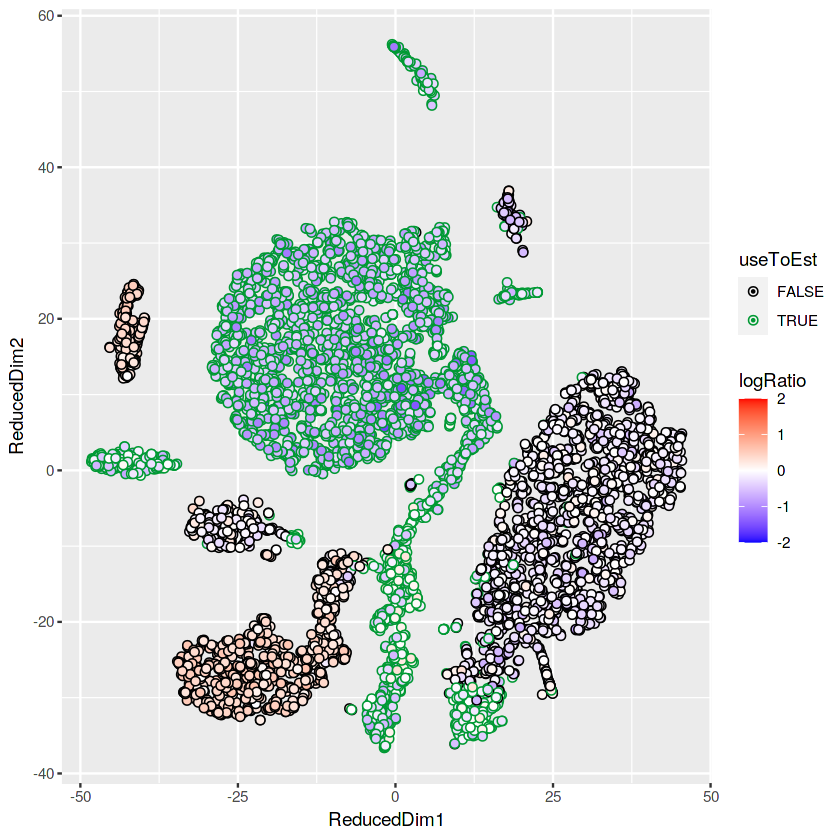

In [64]:
useToEst = estimateNonExpressingCells(sc1, nonExpressedGeneList = list(IG = igGenes), 
    clusters = setNames(PBMC_DR$Cluster, rownames(PBMC_DR)))
plotMarkerMap(sc1, geneSet = igGenes, DR = PBMC_DR, useToEst = useToEst)

In [65]:
sc1 = setClusters(sc1, PBMC_DR$Cluster)

In [66]:
sc1 = calculateContaminationFraction(sc1, list(IG = igGenes), useToEst = useToEst)

Estimated global contamination fraction of 28.62%



In [67]:
head(sc1$metaData)

nUMIs RD1         RD2         rho       clusters rhoLow   
AAACCCAAGAGCGACT-1 12820   3.8874169   9.4966241 0.2862252 2        0.2831795
AAACCCACAAATACAG-1  5540  39.2097603  -8.4613042 0.2862252 0        0.2831795
AAACCCACAAGGTTGG-1  3580 -23.0570518 -25.2987007 0.2862252 3        0.2831795
AAACCCACACGTTCGG-1   984  -0.2879964 -10.5205347 0.2862252 4        0.2831795
AAACCCACACTGGATT-1  7648  30.9884992   6.1024629 0.2862252 0        0.2831795
AAACCCAGTCTAACGT-1 17201 -12.6406828   0.5111249 0.2862252 1        0.2831795
                   rhoHigh  
AAACCCAAGAGCGACT-1 0.2892927
AAACCCACAAATACAG-1 0.2892927
AAACCCACAAGGTTGG-1 0.2892927
AAACCCACACGTTCGG-1 0.2892927
AAACCCACACTGGATT-1 0.2892927
AAACCCAGTCTAACGT-1 0.2892927

In [68]:
sc1 = calculateContaminationFraction(sc1, list(IG = igGenes), useToEst = useToEst, 
    cellSpecificEstimates = TRUE)
quantile(sc1$metaData$rho)

ERROR: Error in calculateContaminationFraction(sc1, list(IG = igGenes), useToEst = useToEst, : unused argument (cellSpecificEstimates = TRUE)


In [69]:
##Manual alternative
#sc = setContaminationFraction(sc, 0.1)

In [70]:
out = adjustCounts(sc1, clusters = setNames(PBMC_DR$Cluster, rownames(PBMC_DR)))

Expanding counts from 21 clusters to 6269 cells.



In [71]:
library(Matrix)
cntSoggy = rowSums(sc1$toc > 0)
cntStrained = rowSums(out > 0)
mostZeroed = tail(sort((cntSoggy - cntStrained)/cntSoggy), n = 10)
mostZeroed

AC104651.1    SAP18P3       RTP4     CARTPT AL079342.2   Z77249.1     SUB1P1 
         1          1          1          1          1          1          1 
AL161452.1  UNC5B-AS1      RAB5C 
         1          1          1

In [72]:
tail(sort(rowSums(sc1$toc > out)/rowSums(sc1$toc > 0)), n = 20)

COL18A1 COL18A1-AS1     SLC19A1   LINC01694       PCBP3  AJ011931.2 
          1           1           1           1           1           1 
     COL6A1      COL6A2     SPATC1L         LSS  AP001469.1  MCM3AP-AS1 
          1           1           1           1           1           1 
     MCM3AP        YBEY    C21orf58        PCNT    RPL18AP2       DIP2A 
          1           1           1           1           1           1 
      S100B       PRMT2 
          1           1

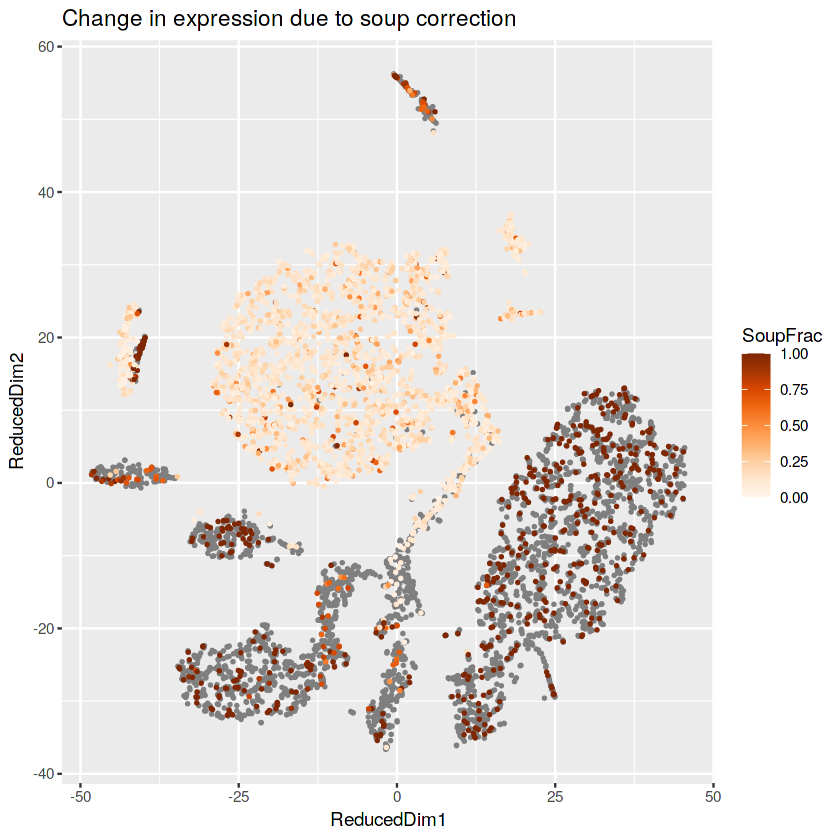

In [73]:
plotChangeMap(sc1, out, "RBFOX3")

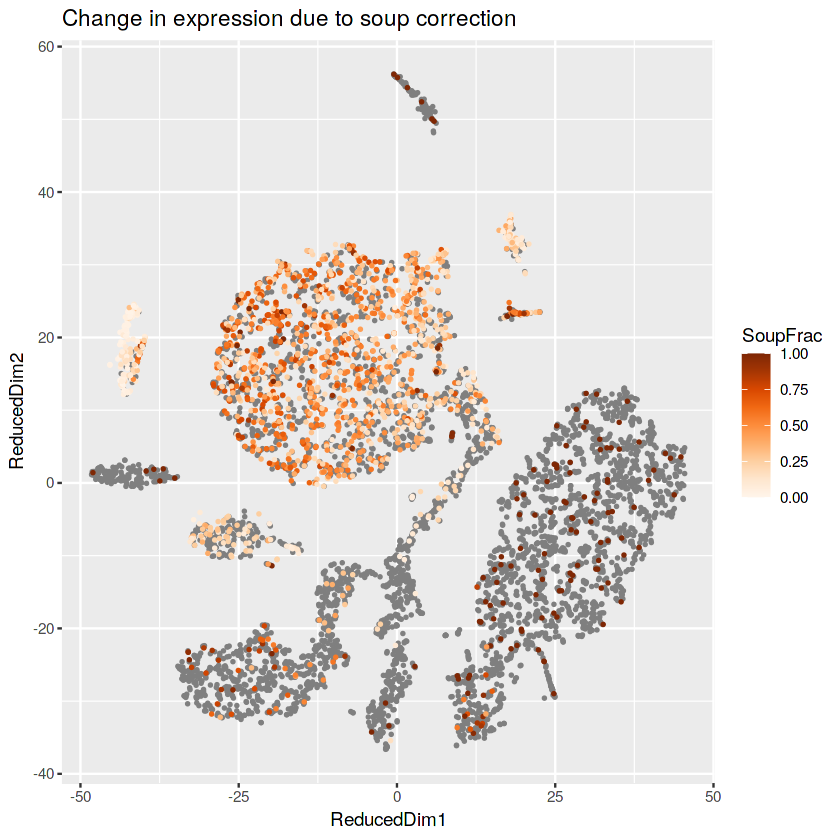

In [74]:
plotChangeMap(sc1, out, "GAD1")

In [75]:
DropletUtils:::write10xCounts("./strainedCounts_Monkey_P_Caudate_Rep1", out)